# iTouch Analyses

This notebook contains the basic analyses for the iTouch data.

First, we identify the paths to the data tables created via the iPosition pipeline.

In [1]:
import os

data_directory = r'C:\Users\Kevin\Documents\GitHub\msl-iposition-pipeline\examples'
touch_tbt_false_path = os.path.join(data_directory, '2018-04-24_11-35-39_touch_tbt_false.csv')
touch_tbt_true_path = os.path.join(data_directory, '2018-04-24_11-35-03_touch_tbt_true.csv')
desktop_tbt_false_path = os.path.join(data_directory, '2018-04-24_11-32-11_desktop_tbt_false.csv')
desktop_tbt_true_path = os.path.join(data_directory, '2018-04-24_11-33-40_desktop_tbt_true.csv')

Next, we open the data files.

In [2]:
import pandas as pd

touch_tbt_false_with_practice = pd.read_csv(touch_tbt_false_path, skiprows=[0])
touch_tbt_true_with_practice = pd.read_csv(touch_tbt_true_path, skiprows=[0])
desktop_tbt_false_with_practice = pd.read_csv(desktop_tbt_false_path, skiprows=[0])
desktop_tbt_true_with_practice = pd.read_csv(desktop_tbt_true_path, skiprows=[0])

Next, we remove the practice trials and reset the indices of the data.

In [3]:
touch_tbt_false = touch_tbt_false_with_practice[['practice' not in x for x in touch_tbt_false_with_practice['subID']]].reset_index()
touch_tbt_true = touch_tbt_true_with_practice[['practice' not in x for x in touch_tbt_true_with_practice['subID']]].reset_index()
desktop_tbt_false = desktop_tbt_false_with_practice[['practice' not in x for x in desktop_tbt_false_with_practice['subID']]].reset_index()
desktop_tbt_true = desktop_tbt_true_with_practice[['practice' not in x for x in desktop_tbt_true_with_practice['subID']]].reset_index()

data = [touch_tbt_false, touch_tbt_true, desktop_tbt_false, desktop_tbt_true]
labels = ['Touch, Collapsed Accuracy', 'Touch, Trial-by-Trial Accuracy', 'Desktop, Collapsed Accuracy', 'Desktop, Trial-by-Trial Accuracy']

We can list our columns for convenience to get the names right.

In [4]:
data[0].columns

Index([u'index', u'subID', u'trial', u'Original Misplacement',
       u'Original Swap', u'Original Edge Resizing',
       u'Original Edge Distortion', u'Axis Swap Pairs',
       u'Pre-Processed Accurate Placements',
       u'Pre-Processed Inaccurate Placements',
       u'Pre-Processed Accuracy Threshold',
       u'Deanonymized Accurate Placements',
       u'Deanonymized Inaccurate Placements',
       u'Deanonymized Accuracy Threshold', u'Raw Deanonymized Misplacement',
       u'Post-Deanonymized Misplacement', u'Transformation Auto-Exclusion',
       u'Number of Points Excluded From Geometric Transform',
       u'Rotation Theta', u'Scaling', u'Translation Magnitude', u'Translation',
       u'TranslationX', u'TranslationY', u'Geometric Distance Threshold',
       u'Post-Transform Misplacement', u'Number of Components',
       u'Accurate Single-Item Placements',
       u'Inaccurate Single-Item Placements', u'True Swaps', u'Partial Swaps',
       u'Cycle Swaps', u'Partial Cycle Swaps', u'

The first thing we want to check is whether or not there is a significant difference between the overall misplacement between the conditions. This difference is not dependent upon the accuracy evaluation method, so we're really just comparing two of the 4 files, but we'll plot all of them to make that clear.

Ttest_indResult(statistic=0.043666795154764015, pvalue=0.96517609259449588)


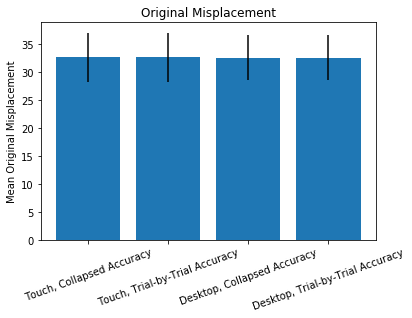

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

%matplotlib inline

metric_column_name = 'Original Misplacement'

means = [x[metric_column_name].mean() for x in data]
errors = [x[metric_column_name].std()/np.sqrt(len(x)/25.0) for x in data]
ind = np.arange(len(data))

plt.title(metric_column_name)
plt.bar(ind, means, yerr=errors)
plt.ylabel('Mean ' + metric_column_name)
plt.xticks(ind, labels, rotation=20)

print(stats.ttest_ind(data[0][metric_column_name], data[2][metric_column_name], equal_var=False))

plt.show()

Finally, we can check for group/analysis type differences in our accuracy measures. There are better ways to do this, but the expected result is that there are going to be differences in these values based on analysis type (because we're drawing the accuracy circle two different ways), but not based on group. The ANOVA, therefore, should be significant, but only the t-tests for analysis type should be significant, not group.

Analysis for Accurate Single-Item Placements
One-Way ANOVA for Analysis/Group Differences
F_onewayResult(statistic=6.6193563855603275, pvalue=0.0001872662749175459)
T-Tests (don't bother looking if the prevous test isn't significant.
______________
T-Test for Analysis Type Difference in Touch Group
Ttest_indResult(statistic=-3.3580467991659186, pvalue=0.00080614829783094992)
T-Test for Analysis Type Difference in Desktop Group
Ttest_indResult(statistic=-2.8990006143876128, pvalue=0.0037979275370486273)
T-Test for Group Difference in Collapsed Analysis
Ttest_indResult(statistic=-0.11199106577529323, pvalue=0.91084605660139872)
T-Test for Group Difference in Collapsed Analysis
Ttest_indResult(statistic=0.56328552670304388, pvalue=0.57332839447595418)


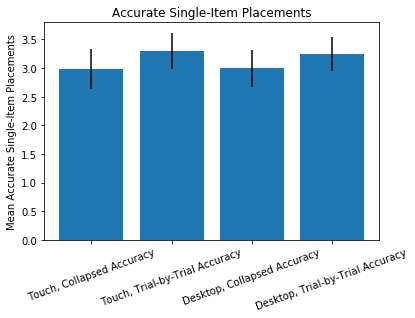

Analysis for Accurate Misassignment
One-Way ANOVA for Analysis/Group Differences
F_onewayResult(statistic=8.5446438758736765, pvalue=1.1984286165336574e-05)
T-Tests (don't bother looking if the prevous test isn't significant.
______________
T-Test for Analysis Type Difference in Touch Group
Ttest_indResult(statistic=-3.3404792766143077, pvalue=0.00085914774732285333)
T-Test for Analysis Type Difference in Desktop Group
Ttest_indResult(statistic=-3.7529333281946089, pvalue=0.00018172696486871777)
T-Test for Group Difference in Collapsed Analysis
Ttest_indResult(statistic=-0.27623243920652918, pvalue=0.78240903514567295)
T-Test for Group Difference in Collapsed Analysis
Ttest_indResult(statistic=-0.53885840512114858, pvalue=0.59006707469955755)


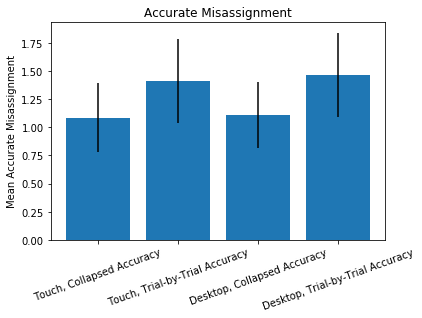

Analysis for Rotation Theta
One-Way ANOVA for Analysis/Group Differences
F_onewayResult(statistic=nan, pvalue=nan)
T-Tests (don't bother looking if the prevous test isn't significant.
______________
T-Test for Analysis Type Difference in Touch Group
Ttest_indResult(statistic=nan, pvalue=nan)
T-Test for Analysis Type Difference in Desktop Group
Ttest_indResult(statistic=nan, pvalue=nan)
T-Test for Group Difference in Collapsed Analysis
Ttest_indResult(statistic=nan, pvalue=nan)
T-Test for Group Difference in Collapsed Analysis
Ttest_indResult(statistic=nan, pvalue=nan)


C:\Program Files\Anaconda3\envs\iposition\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Program Files\Anaconda3\envs\iposition\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Program Files\Anaconda3\envs\iposition\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


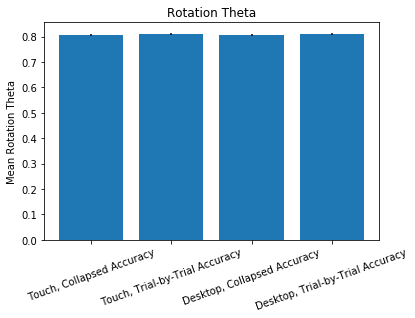

Analysis for Scaling
One-Way ANOVA for Analysis/Group Differences
F_onewayResult(statistic=nan, pvalue=nan)
T-Tests (don't bother looking if the prevous test isn't significant.
______________
T-Test for Analysis Type Difference in Touch Group
Ttest_indResult(statistic=nan, pvalue=nan)
T-Test for Analysis Type Difference in Desktop Group
Ttest_indResult(statistic=nan, pvalue=nan)
T-Test for Group Difference in Collapsed Analysis
Ttest_indResult(statistic=nan, pvalue=nan)
T-Test for Group Difference in Collapsed Analysis
Ttest_indResult(statistic=nan, pvalue=nan)


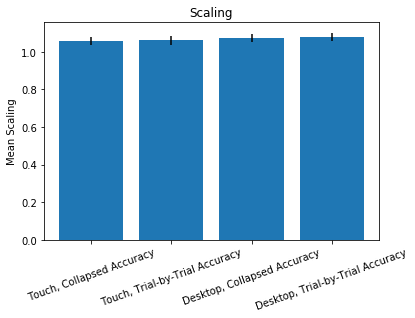

Analysis for Translation Magnitude
One-Way ANOVA for Analysis/Group Differences
F_onewayResult(statistic=nan, pvalue=nan)
T-Tests (don't bother looking if the prevous test isn't significant.
______________
T-Test for Analysis Type Difference in Touch Group
Ttest_indResult(statistic=nan, pvalue=nan)
T-Test for Analysis Type Difference in Desktop Group
Ttest_indResult(statistic=nan, pvalue=nan)
T-Test for Group Difference in Collapsed Analysis
Ttest_indResult(statistic=nan, pvalue=nan)
T-Test for Group Difference in Collapsed Analysis
Ttest_indResult(statistic=nan, pvalue=nan)


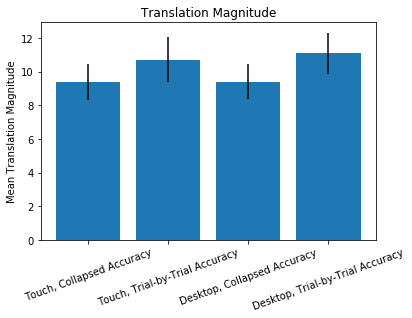

Analysis for TranslationX
One-Way ANOVA for Analysis/Group Differences
F_onewayResult(statistic=nan, pvalue=nan)
T-Tests (don't bother looking if the prevous test isn't significant.
______________
T-Test for Analysis Type Difference in Touch Group
Ttest_indResult(statistic=nan, pvalue=nan)
T-Test for Analysis Type Difference in Desktop Group
Ttest_indResult(statistic=nan, pvalue=nan)
T-Test for Group Difference in Collapsed Analysis
Ttest_indResult(statistic=nan, pvalue=nan)
T-Test for Group Difference in Collapsed Analysis
Ttest_indResult(statistic=nan, pvalue=nan)


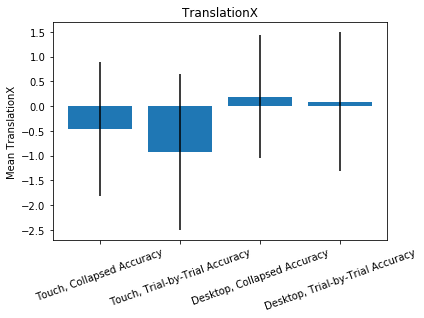

Analysis for TranslationY
One-Way ANOVA for Analysis/Group Differences
F_onewayResult(statistic=nan, pvalue=nan)
T-Tests (don't bother looking if the prevous test isn't significant.
______________
T-Test for Analysis Type Difference in Touch Group
Ttest_indResult(statistic=nan, pvalue=nan)
T-Test for Analysis Type Difference in Desktop Group
Ttest_indResult(statistic=nan, pvalue=nan)
T-Test for Group Difference in Collapsed Analysis
Ttest_indResult(statistic=nan, pvalue=nan)
T-Test for Group Difference in Collapsed Analysis
Ttest_indResult(statistic=nan, pvalue=nan)


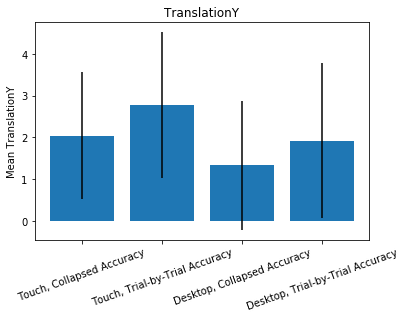

Analysis for True Swaps
One-Way ANOVA for Analysis/Group Differences
F_onewayResult(statistic=2.578272480341496, pvalue=0.05202982148628961)
T-Tests (don't bother looking if the prevous test isn't significant.
______________
T-Test for Analysis Type Difference in Touch Group
Ttest_indResult(statistic=-1.4906696491707387, pvalue=0.13627480027514999)
T-Test for Analysis Type Difference in Desktop Group
Ttest_indResult(statistic=-2.1888978998908843, pvalue=0.028761107102234409)
T-Test for Group Difference in Collapsed Analysis
Ttest_indResult(statistic=-0.24145319144542723, pvalue=0.80923828637082851)
T-Test for Group Difference in Collapsed Analysis
Ttest_indResult(statistic=-0.86211482956312024, pvalue=0.38876629702086651)


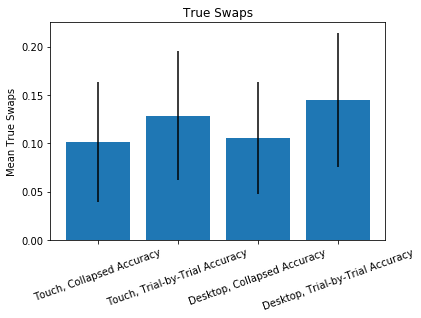

Analysis for Cycle Swaps
One-Way ANOVA for Analysis/Group Differences
F_onewayResult(statistic=1.9346692651444166, pvalue=0.12179750940384659)
T-Tests (don't bother looking if the prevous test isn't significant.
______________
T-Test for Analysis Type Difference in Touch Group
Ttest_indResult(statistic=-0.48299263169784989, pvalue=0.62917709969050639)
T-Test for Analysis Type Difference in Desktop Group
Ttest_indResult(statistic=-1.9932763886683198, pvalue=0.046421108404633385)
T-Test for Group Difference in Collapsed Analysis
Ttest_indResult(statistic=1.7985478644309401, pvalue=0.072316728511744893)
T-Test for Group Difference in Collapsed Analysis
Ttest_indResult(statistic=0.34548893481476256, pvalue=0.72977778161540385)


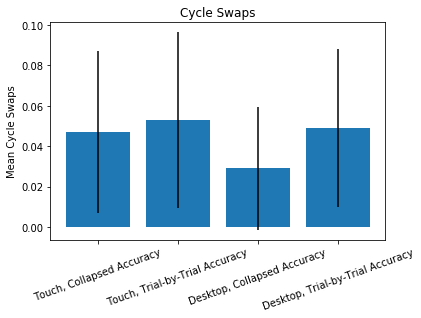

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

%matplotlib inline

metric_column_names = ['Accurate Single-Item Placements', 'Accurate Misassignment', 
                       'Rotation Theta', 'Scaling', 'Translation Magnitude', 
                       'TranslationX', 'TranslationY', 'True Swaps', 'Cycle Swaps']

for metric_column_name in metric_column_names:
    means = [x[metric_column_name].mean() for x in data]
    errors = [x[metric_column_name].std()/np.sqrt(len(x)/25.0) for x in data]
    ind = np.arange(len(data))

    plt.title(metric_column_name)
    plt.bar(ind, means, yerr=errors)
    plt.ylabel('Mean ' + metric_column_name)
    plt.xticks(ind, labels, rotation=20)
    
    print('Analysis for ' + metric_column_name)
    print('One-Way ANOVA for Analysis/Group Differences')
    print(stats.f_oneway(*[list(x[metric_column_name].values) for x in data]))
    print('T-Tests (don\'t bother looking if the prevous test isn\'t significant.')
    print('______________')
    print('T-Test for Analysis Type Difference in Touch Group')
    print(stats.ttest_ind(data[0][metric_column_name], data[1][metric_column_name], equal_var=False))
    print('T-Test for Analysis Type Difference in Desktop Group')
    print(stats.ttest_ind(data[2][metric_column_name], data[3][metric_column_name], equal_var=False))
    print('T-Test for Group Difference in Collapsed Analysis')
    print(stats.ttest_ind(data[0][metric_column_name], data[2][metric_column_name], equal_var=False))
    print('T-Test for Group Difference in Collapsed Analysis')
    print(stats.ttest_ind(data[1][metric_column_name], data[3][metric_column_name], equal_var=False))
    
    plt.show()